In [ ]:
# Colab 한글 깨짐 해결 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

In [1]:
# matplotlib 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# 배깅 (Bagging)

- 사이킷런의 ensemble에서 BaggingClassifier를 불러올 수 있다.

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True)

In [3]:
model_bag = BaggingClassifier(DecisionTreeClassifier(random_state = 10),
                              n_estimators = 100,
                              max_samples = 40).fit(X_train, y_train)

#### BaggingClassfier의 파라미터들
  - base_estimator : 어떤 모델로 평가를 할 지 정해줄 수 있는 파라미터이다. 값을 지정해주지 않으면 자동적으로 Decision Tree로 실행된다.
  - n_estimators : 몇 개의 모델을 앙상블해서 훈련시킬지 정해주는 파라미터, 기본값은 10이다.
  - max_samples : 데이터 중 몇 개의 데이터를 선택할 지 정해주는 파라미터, 기본값은 1.0으로 int형으로 갯수를 지정해줄 수 있고 float형식으로 비율을 정해줄 수 있다.
  - bootstrap : 데이터의 중복 사용 여부를 정해줄 수 있다. 기본값은 True.
  - n_jobs : 훈련과 예측에서 사용할 CPU 코어 수를 지정할 수 있다. ( -1로 설정시 가용한 모든 코어 사용)
  - odd_score : 사용되지 않은 데이터를 가지고 모델을 평가하도록 설정하는 파라미터, 기본값은 True.

In [4]:
model_dt = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

In [5]:
print('배깅을 사용한 경우의 test score : {:.3f}'.format(model_bag.score(X_test, y_test)))
print('결정트리의 test score : {:.3f}'.format(model_dt.score(X_test, y_test)))

배깅을 사용한 경우의 test score : 0.763
결정트리의 test score : 0.737


In [6]:
# boolean indexing
import numpy as np

temp = np.array([1, 4, 9, 16, 25])

In [7]:
boolean_idx = [True, False, False, True, True]

In [8]:
temp[boolean_idx]

array([ 1, 16, 25])

In [9]:
def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([4.5, 7.6])
    plt.ylim([2.0, 4.0])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

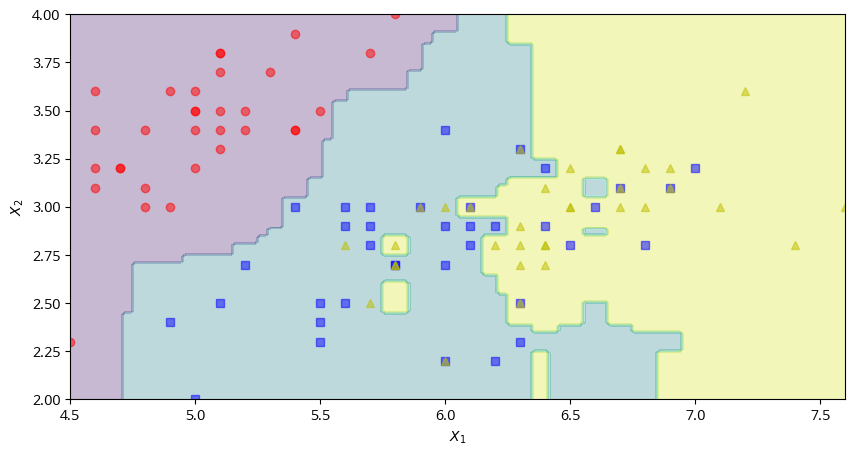

In [10]:
model_border(model_bag, X_train, y_train)

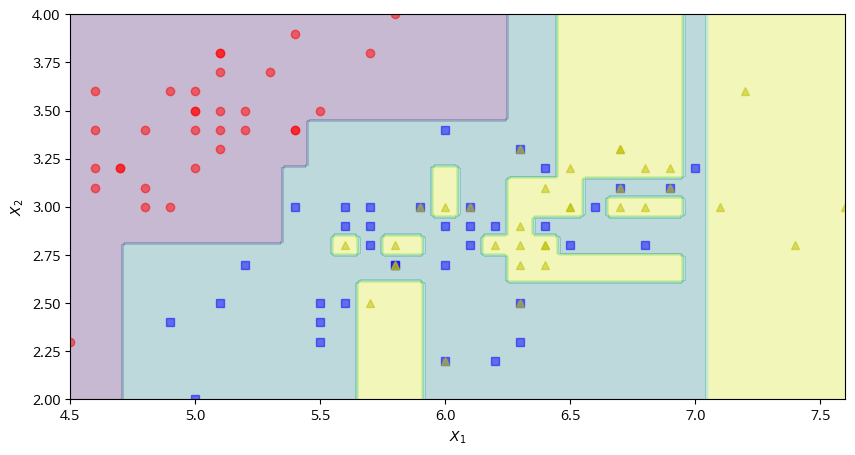

In [11]:
model_border(model_dt, X_train, y_train)

- 배깅을 사용한 모델의 경계가 덜 불규칙한 모습을 띄고 있는 것을 확인할 수 있다.

# Random Forest

- 랜덤 포레스트는 배깅 방법을 적용한 결정 트리의 앙상블모델이다.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RandomForestClassifier?

#### 랜덤 포레스트의 파라미터
  - 랜덤 포레스트의 파라미터는 BaggingClassifier와 DecisionTreeClassifier를 제어하는 파라미터를 모두 가지고 있다.(splitter, presort, max_samples, base_estimator를 제외한다.)
  - n_estimators : 트리의 수를 설정한다.(Bagging 과 DecisionTree의 결합이기 때문에)
  - max_features : 각 노드에서 선택하는 특성의 수 (무작위 선택), max_features의 값이 커지면 각 트리들은 비슷해지고, 값을 낮추면 트리들이 서로 많이 달라지고 데이터에 맞추기위해 깊이가 깊어지게 된다.

In [14]:
model_rf = RandomForestClassifier(n_estimators = 8,
                                  random_state = 0).fit(X_train, y_train)

In [15]:
model_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855)]

- 랜덤 포레스트로 만들어진 트리는 estimators_에 저장이된다.

In [16]:
model_rf.classes_

array([0, 1, 2])

- classes_로 클래스를 확인할 수 있다.

In [17]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

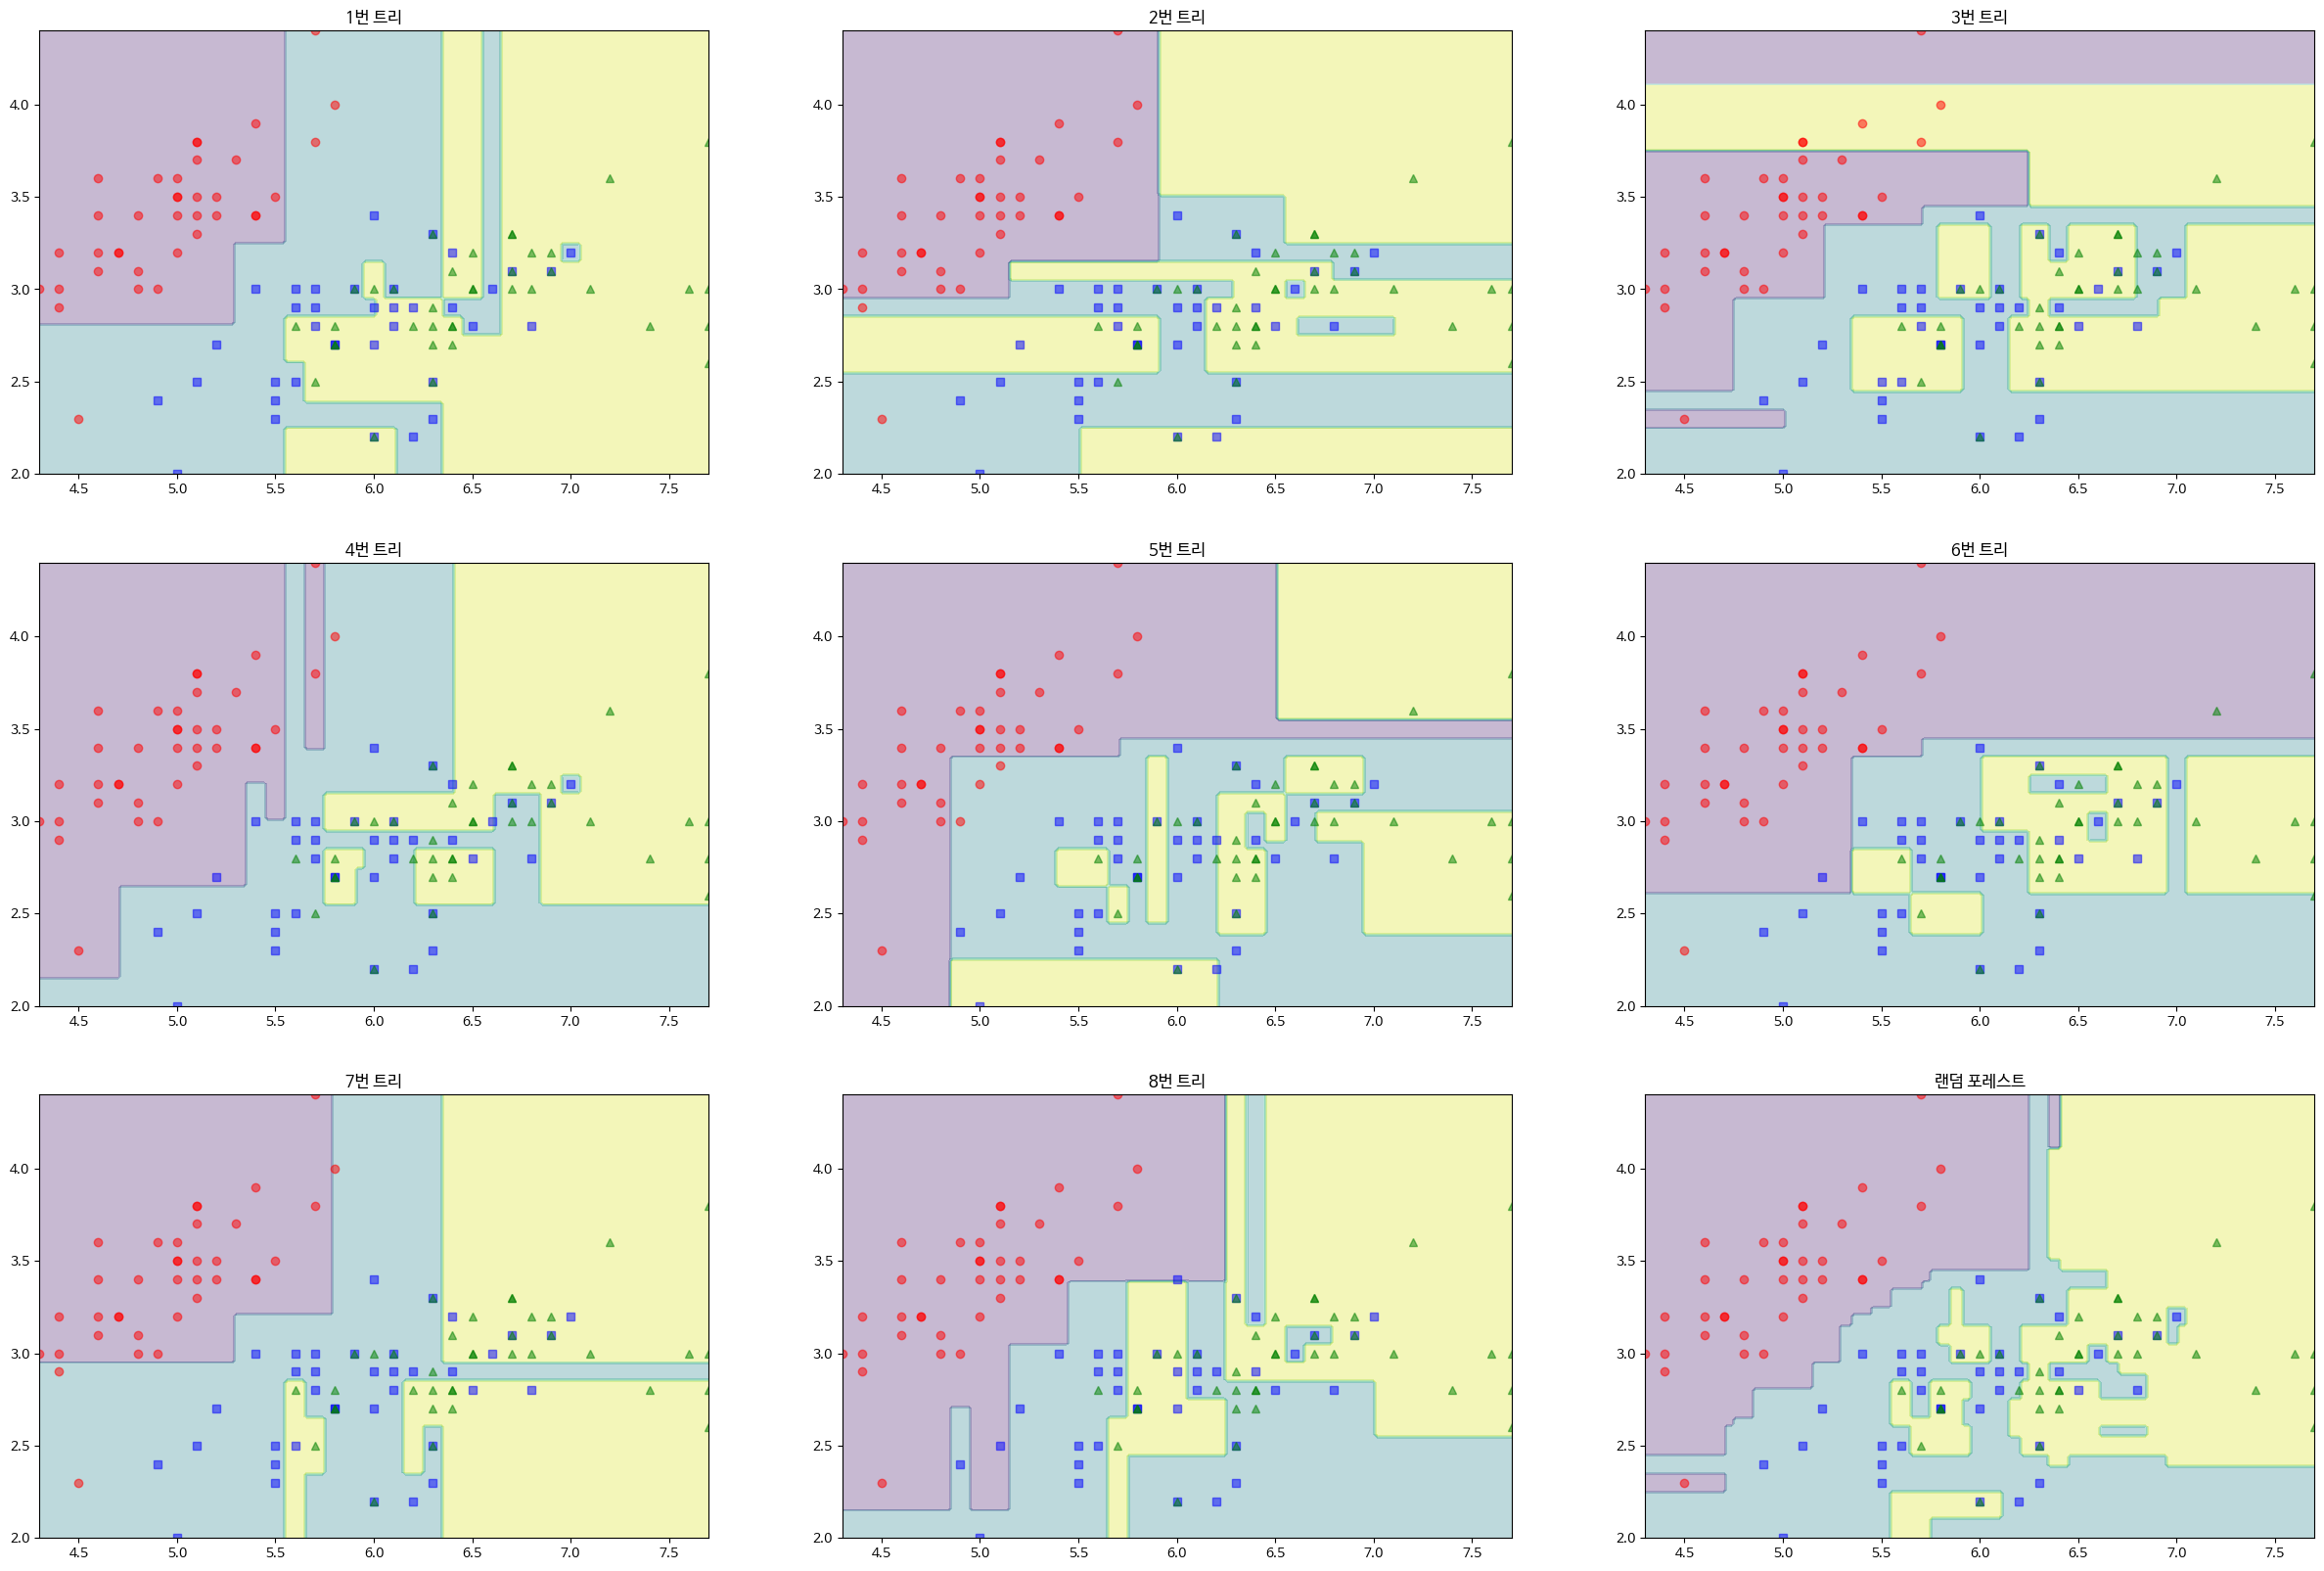

In [18]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 트리")
draw_border(model_rf.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 트리")
draw_border(model_rf.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 트리")
draw_border(model_rf.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 트리")
draw_border(model_rf.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 트리")
draw_border(model_rf.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 트리")
draw_border(model_rf.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 트리")
draw_border(model_rf.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 트리")
draw_border(model_rf.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("랜덤 포레스트")
draw_border(model_rf, X_train, y_train)

# plt.sublpot(3,3,1)은 3행 3열 1번째 공간에 그래프를 그린다.

- 아홉 개의 트리마다 경계가 각각 다르다는 것을 확인할 수 있다.
- 예제에서는 아홉개의 트리만 이용했지만 큰 데이터를 이용해서 트리의 개수를 수백 개 또는 그 이상으로 늘리면 경계가 더 부드러워진다.

In [19]:
print('train score : {:.3f}'.format(model_rf.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_rf.score(X_test, y_test)))

train score : 0.902
test score : 0.711


In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2,
                                                   shuffle = True)

randf = RandomForestClassifier(n_estimators=50,
                               random_state=42).fit(X_train, y_train)

In [21]:
randf.feature_importances_

array([0.0407768 , 0.00884715, 0.06026112, 0.03499977, 0.00353596,
       0.01652979, 0.08852413, 0.08604738, 0.00396768, 0.00351197,
       0.02343229, 0.00250987, 0.01771912, 0.032908  , 0.00382754,
       0.00463354, 0.00341302, 0.00334286, 0.00203654, 0.00495868,
       0.09074296, 0.01775693, 0.09768587, 0.08317985, 0.00904134,
       0.02175335, 0.06129079, 0.16053023, 0.00745868, 0.00477679])

- 특성의 중요도를 살펴보면 0인 값이 존재하지 않는다.

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 5,
                            random_state=42).fit(X_train, y_train)

In [23]:
dtc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0880437 , 0.        , 0.        ,
       0.        , 0.00644226, 0.02648955, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02191736,
       0.01153316, 0.10239247, 0.63139003, 0.        , 0.        ,
       0.        , 0.        , 0.09886308, 0.01292839, 0.        ])

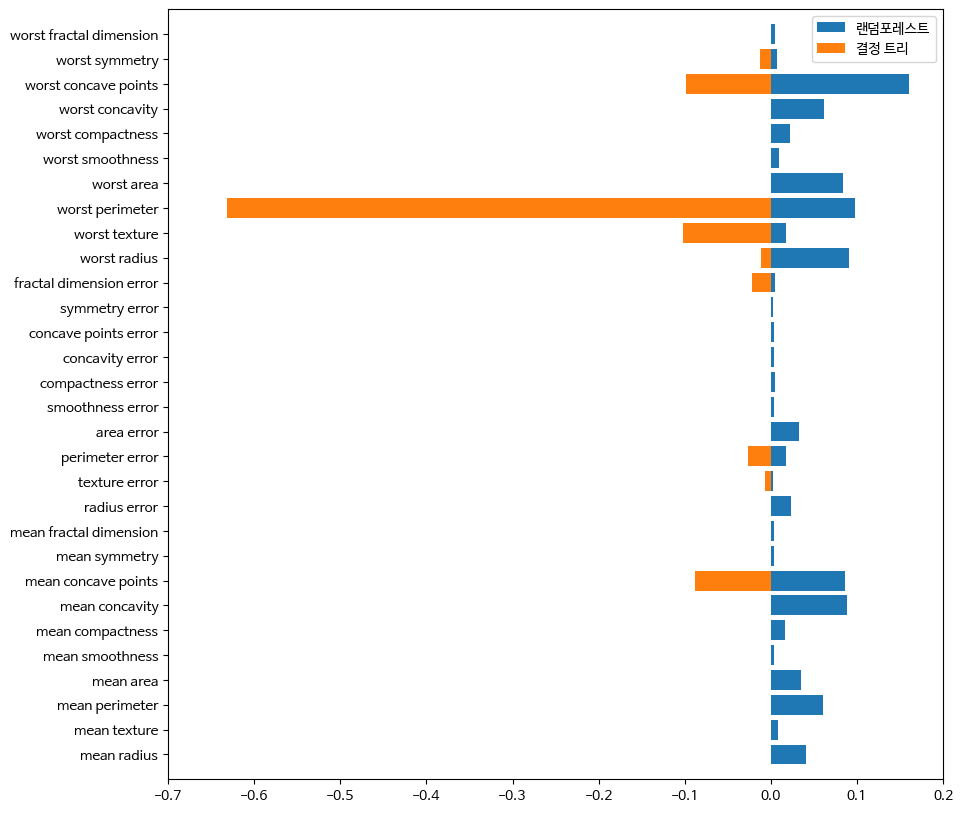

In [24]:
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = dtc.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.xlim([-0.7, 0.2])
plt.ylim(-1, cancer.data.shape[1])
plt.legend(["랜덤포레스트", "결정 트리"])
plt.show()

- 결정트리와 특성의 중요도를 비교했다. 결정트리에선 worst radius 특성이 매우 중요하다고 나오지만 랜덤 포레스트에서는 worst radius를 중요하게 생각하지만 그에 못지않게 중요도가 높게 나오는 특성들이 존재한다.

- 랜덤 포레스트는 n_estimators가 클수록 좋다. 그러나 너무 많은 트리는 훈련시간이 길어지는 단점이 있다. 그러므로 적당한 트리 수를 가용된 시간과 메모리의 양을 따져서 정해줘야 한다.